# The Daniel Werner approach

From <http://experimentalscene.com/articles/minbleps.php>:

> To implement a MinBLEP oscillator, a simple method is to have an accumulator and a circular buffer. The accumulator stores a single floating point value which starts at 0.0f. The circular buffer is all zeros at the start, and you write the MinBLEPs that you add at each discontinuity into this buffer. Output from the oscillator is generated by adding the circular buffer to the accumulator value. When you insert a MinBLEP, add or subtract 1.0f from the accumulator value. Insert the MinBLEP offset by -1.0f for a positive, 1.0f for negative, so at it's first value (which is near zero) and offset it will cancel out the effect of the accumulator, but when it reaches the end of the MinBLEP, the accumulator value will no longer be cancelled as the sum of the offset and the final MinBLEP value of 1.0f will equal zero and the signal will be at the new inverted value after the step.

Now that we've gone through the basic MinBLEP construction, let's try to figure out this algorithm

In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from minblep import generate_min_blep, gen_pure_saw, gen_bl_saw
from minblep.util import plot_spectrum

from IPython.display import Audio

SAMPLE_RATE = 44100

In [3]:
MIN_BLEP_50_4 = list(generate_min_blep(100, 4))

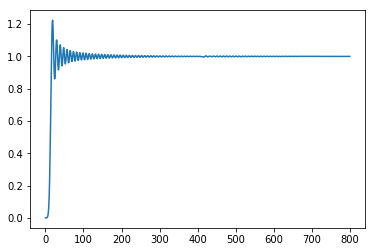

In [4]:
plot(MIN_BLEP_50_4)

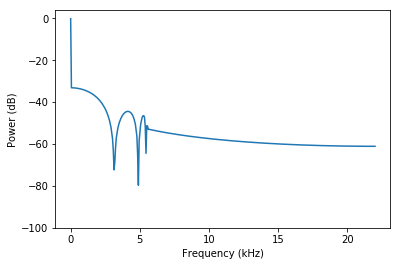

In [5]:
plot_spectrum(MIN_BLEP_50_4, SAMPLE_RATE)

In [6]:
def gen_square(osc_freq, duration, sample_rate, blep):
    accum = 0.0
    buf_size = 2 * len(blep)
    buf = np.array([0.0] * buf_size)
    buf_ix = 0
    curr_state = 0
    
    def flip():
        if curr_state == 0:
            # flipping to hi
            first_part = blep[:(buf_size - buf_ix)]
        accum
        pass
    
    phase = 0.0
    for i in range(0, duration):
        phase = phase + (2 * np.pi * osc_freq) / sample_rate)
        if phase > np.pi:
            flip()
            phase = 0.0
        accum += buf[buf_ix]
        buf_ix = (buf_ix + 1) % buf_size
        yield accum

SyntaxError: invalid syntax (<ipython-input-6-b32a3689901a>, line 17)